In [8]:
# Turunkan numpy dulu
#%pip install numpy==1.25.2

In [9]:
# Baru install mediapipe setelah numpy kompatibel
%pip install mediapipe==0.10.8 protobuf==3.20.3 numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip tensorflow 

Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "tensorflow"



In [11]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [12]:
import os, cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False)

DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data"
keypoints, labels = [], []

class_names = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])

for idx, class_name in enumerate(class_names):
    folder = os.path.join(DATA_DIR, class_name)
    for file in os.listdir(folder):
        if not file.endswith(".mp4"):
            continue
        cap = cv2.VideoCapture(os.path.join(folder, file))
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (224, 224))
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb)
            if results.pose_landmarks:
                lm = results.pose_landmarks.landmark
                keypoints.append([p.x for p in lm] + [p.y for p in lm])
                labels.append(idx)
        cap.release()

X = np.array(keypoints)
y = np.array(labels)


In [13]:
from sklearn.model_selection import train_test_split

# Ubah (66,) menjadi (11, 6, 1) agar bisa masuk CNN
X = X.reshape(-1, 11, 6, 1)  # 33 keypoints * 2 = 66
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Daftar nama kelas sesuai dataset
class_names = [
    "Neck Stretch", "Shoulder Rolls", "Arm Circles", "Side Stretch", "Torso Twist",
    "Hip Circles", "Forward Bend", "Knee Lifts", "Lunges", "Squats",
    "Calf Raises", "Jumping Jacks", "Ankle Circles", "Wrist Stretch", "Breathing Exercise"
]
num_classes = len(class_names)  # = 15

# Misalnya dataset (dummy) dimuat dari file .csv atau preprocessing sebelumnya
# Contoh dummy (hapus & ganti dengan dataset aslimu)
X_train = np.random.rand(100, 66)  # 100 sampel, 66 fitur (33 keypoint * 2 (x, y))
y_train = np.random.randint(0, num_classes, size=(100,))

# Reshape ke format gambar kecil (11x6x1)
X_train = X_train.reshape(-1, 11, 6, 1)

# Model CNN
def build_cnn_pose_model(input_shape=(11, 6, 1), num_classes=15):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_cnn_pose_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.1)

# Simpan model (gunakan raw string agar tidak error path)
model.save("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model2\pose_cnn_model.h5")
print("✅ Model berhasil disimpan.")


Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.0564 - loss: 2.6978 - val_accuracy: 0.1000 - val_loss: 2.6774
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0982 - loss: 2.6232 - val_accuracy: 0.1000 - val_loss: 2.6187
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.1061 - loss: 2.5643 - val_accuracy: 0.1000 - val_loss: 2.6771
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1302 - loss: 2.5268 - val_accuracy: 0.1000 - val_loss: 2.6645
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2061 - loss: 2.5271 - val_accuracy: 0.1000 - val_loss: 2.6079
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.1438 - loss: 2.5117 - val_accuracy: 0.1000 - val_loss: 2.5598
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2053 - loss: 2.4599 - val_accuracy: 0.2000 - val_loss: 2.6090
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.2667 - loss: 2.4708 - val_accuracy: 0.2000 - val_loss:

✅ Model berhasil disimpan.


342/342 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


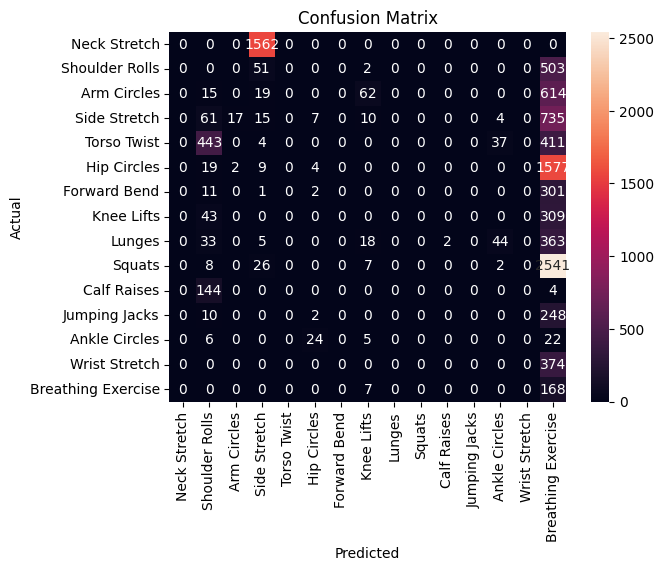

                    precision    recall  f1-score   support

      Neck Stretch       0.00      0.00      0.00      1562
    Shoulder Rolls       0.00      0.00      0.00       556
       Arm Circles       0.00      0.00      0.00       710
      Side Stretch       0.01      0.02      0.01       849
       Torso Twist       0.00      0.00      0.00       895
       Hip Circles       0.10      0.00      0.00      1611
      Forward Bend       0.00      0.00      0.00       315
        Knee Lifts       0.00      0.00      0.00       352
            Lunges       0.00      0.00      0.00       465
            Squats       0.00      0.00      0.00      2584
       Calf Raises       0.00      0.00      0.00       148
     Jumping Jacks       0.00      0.00      0.00       260
     Ankle Circles       0.00      0.00      0.00        57
     Wrist Stretch       0.00      0.00      0.00       374
Breathing Exercise       0.02      0.96      0.04       175

          accuracy                    

d:\Semester 6\program\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Semester 6\program\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
d:\Semester 6\program\Python310\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [15]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred_class, target_names=class_names))


In [16]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\pose_cnn_model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmp6rirhonb\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmp6rirhonb\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmp6rirhonb'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11, 6, 1), dtype=tf.float32, name='keras_tensor_7')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2941351355216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941349016528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941349014240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941349014064: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941349007200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941349006496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941349018464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941349013360: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Class Ankle Circles

In [17]:
import os
DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data"
print(os.listdir(DATA_DIR))  # Pastikan ada folder kelas
for folder in os.listdir(DATA_DIR):
    print(f"Folder {folder} has files: ", os.listdir(os.path.join(DATA_DIR, folder)))

['Ankle Circles', 'Arm Circles', 'Breathing Exercise', 'Calf Raises', 'Forward Bend', 'Hip Circles', 'Jumping Jacks', 'Knee Lifts', 'Lunges', 'Neck Stretch', 'Shoulder Rolls', 'Side Stretch', 'Squats', 'Torso Twist', 'Wrist Stretch']
Folder Ankle Circles has files:  ['ankle circles 1.mp4']
Folder Arm Circles has files:  ['arm circles 1.mp4', 'arm circles 2.mp4']
Folder Breathing Exercise has files:  ['breathing exercise 1.mp4', 'breathing exercise 2.mp4', 'breathing exercise 3.mp4']
Folder Calf Raises has files:  ['calf raises 1.mp4', 'calf raises 2.mp4']
Folder Forward Bend has files:  ['forward bend 1.mp4', 'forward bend 2.mp4']
Folder Hip Circles has files:  ['hip circles 1.mp4', 'Hip_circles.mp4']
Folder Jumping Jacks has files:  ['jumping jacks 1.mp4', 'jumping jacks 2.mp4']
Folder Knee Lifts has files:  ['knee lifts 1.mp4']
Folder Lunges has files:  ['lunges 1.mp4']
Folder Neck Stretch has files:  ['neck stretch 1.mp4', 'neck stretch 2.mp4']
Folder Shoulder Rolls has files:  ['sh

In [18]:
import os
import cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False)

# DATA_DIR sudah langsung ke folder kelas
DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data\Ankle Circles"

class_folder = DATA_DIR  # langsung folder kelas tanpa gabung lagi

keypoints, labels = [], []

# Cek apakah ada subfolder
subfolders = [f for f in os.listdir(class_folder) if os.path.isdir(os.path.join(class_folder, f))]

if len(subfolders) > 0:
    # Kalau ada subfolder, proses video di tiap subfolder
    for subfolder in subfolders:
        folder_path = os.path.join(class_folder, subfolder)
        for file in os.listdir(folder_path):
            if not file.endswith(".mp4"):
                continue
            video_path = os.path.join(folder_path, file)
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Gagal membuka video: {video_path}")
                continue
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, (224, 224))
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(rgb)
                if results.pose_landmarks:
                    lm = results.pose_landmarks.landmark
                    keypoints.append([p.x for p in lm] + [p.y for p in lm])
                    labels.append(0)  # hanya satu kelas, label=0
            cap.release()
else:
    # Kalau tidak ada subfolder, langsung proses video di folder kelas
    for file in os.listdir(class_folder):
        if not file.endswith(".mp4"):
            continue
        video_path = os.path.join(class_folder, file)
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Gagal membuka video: {video_path}")
            continue
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (224, 224))
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb)
            if results.pose_landmarks:
                lm = results.pose_landmarks.landmark
                keypoints.append([p.x for p in lm] + [p.y for p in lm])
                labels.append(0)
        cap.release()

X = np.array(keypoints)
y = np.array(labels)

print(f"Jumlah data pose yang terbaca: {len(X)}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")


Jumlah data pose yang terbaca: 7532
Shape X: (7532, 66)
Shape y: (7532,)


In [19]:
from sklearn.model_selection import train_test_split
import numpy as np

# Misal kamu sudah punya X dan y, dan hanya dari satu kelas
print(f"Jumlah data pose: {len(X)}")
print(f"Shape X: {X.shape}")

# Validasi jumlah fitur
if X.shape[1] != 66:
    raise ValueError(f"Jumlah fitur ({X.shape[1]}) tidak sesuai 66 (33 landmark * 2)")

# Reshape untuk input ke CNN
X = X.reshape(-1, 11, 6, 1)

# Karena hanya satu kelas, jangan pakai stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data training: {X_train.shape}, Data testing: {X_test.shape}")


Jumlah data pose: 7532
Shape X: (7532, 66)
Data training: (6025, 11, 6, 1), Data testing: (1507, 11, 6, 1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Misalnya semua data adalah satu kelas, maka label harus 1
y_train = np.ones(len(y_train))
y_test = np.ones(len(y_test))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(11, 6, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output satu neuron, sigmoid
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

d:\Semester 6\program\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 11, 6, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,953 (554.50 KB)

 Trainable params: 141,953 (554.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9933 - loss: 0.0665 - val_accuracy: 1.0000 - val_loss: 1.0386e-09
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 4.8450e-07 - val_accuracy: 1.0000 - val_loss: 5.7139e-10
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 4.8764e-07 - val_accuracy: 1.0000 - val_loss: 3.1001e-10
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 2.3726e-07 - val_accuracy: 1.0000 - val_loss: 2.3207e-10
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 3.4013e-07 - val_accuracy: 1.0000 - val_loss: 1.6063e-10
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 1.0000 - loss: 1.5090e-07 - val_accuracy: 1.0000 - val_loss: 7.6848e-11
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 1.6886e-07 - val_accuracy: 1.0000 - val_loss: 5.3914e-11
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/st

In [21]:
# Simpan model
model.save("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Ankel_Circ_model.h5")

In [22]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Ankle_Circ_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpo4ybnyxn\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpo4ybnyxn\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmpo4ybnyxn'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11, 6, 1), dtype=tf.float32, name='keras_tensor_14')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2941349007728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941234778480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941234774784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941146213264: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941146212736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941146215552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941146216960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941146217312: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Class Calf_Raises

In [23]:
import os
import cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False)

# DATA_DIR sudah langsung ke folder kelas
DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data\Calf Raises"

class_folder = DATA_DIR  # langsung folder kelas tanpa gabung lagi

keypoints, labels = [], []

# Cek apakah ada subfolder
subfolders = [f for f in os.listdir(class_folder) if os.path.isdir(os.path.join(class_folder, f))]

if len(subfolders) > 0:
    # Kalau ada subfolder, proses video di tiap subfolder
    for subfolder in subfolders:
        folder_path = os.path.join(class_folder, subfolder)
        for file in os.listdir(folder_path):
            if not file.endswith(".mp4"):
                continue
            video_path = os.path.join(folder_path, file)
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Gagal membuka video: {video_path}")
                continue
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, (224, 224))
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(rgb)
                if results.pose_landmarks:
                    lm = results.pose_landmarks.landmark
                    keypoints.append([p.x for p in lm] + [p.y for p in lm])
                    labels.append(0)  # hanya satu kelas, label=0
            cap.release()
else:
    # Kalau tidak ada subfolder, langsung proses video di folder kelas
    for file in os.listdir(class_folder):
        if not file.endswith(".mp4"):
            continue
        video_path = os.path.join(class_folder, file)
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Gagal membuka video: {video_path}")
            continue
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (224, 224))
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb)
            if results.pose_landmarks:
                lm = results.pose_landmarks.landmark
                keypoints.append([p.x for p in lm] + [p.y for p in lm])
                labels.append(0)
        cap.release()

X = np.array(keypoints)
y = np.array(labels)

print(f"Jumlah data pose yang terbaca: {len(X)}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")


Jumlah data pose yang terbaca: 4395
Shape X: (4395, 66)
Shape y: (4395,)


In [24]:
from sklearn.model_selection import train_test_split
import numpy as np

# Misal kamu sudah punya X dan y, dan hanya dari satu kelas
print(f"Jumlah data pose: {len(X)}")
print(f"Shape X: {X.shape}")

# Validasi jumlah fitur
if X.shape[1] != 66:
    raise ValueError(f"Jumlah fitur ({X.shape[1]}) tidak sesuai 66 (33 landmark * 2)")

# Reshape untuk input ke CNN
X = X.reshape(-1, 11, 6, 1)

# Karena hanya satu kelas, jangan pakai stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data training: {X_train.shape}, Data testing: {X_test.shape}")


Jumlah data pose: 4395
Shape X: (4395, 66)
Data training: (3516, 11, 6, 1), Data testing: (879, 11, 6, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Misalnya semua data adalah satu kelas, maka label harus 1
y_train = np.ones(len(y_train))
y_test = np.ones(len(y_test))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(11, 6, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output satu neuron, sigmoid
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

d:\Semester 6\program\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 11, 6, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,953 (554.50 KB)

 Trainable params: 141,953 (554.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9613 - loss: 0.1314 - val_accuracy: 1.0000 - val_loss: 1.4796e-07
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 8.5115e-07 - val_accuracy: 1.0000 - val_loss: 1.2649e-07
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 1.2039e-06 - val_accuracy: 1.0000 - val_loss: 1.0078e-07
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 6.8639e-07 - val_accuracy: 1.0000 - val_loss: 8.1958e-08
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 7.9497e-07 - val_accuracy: 1.0000 - val_loss: 6.2388e-08
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 3.7432e-07 - val_accuracy: 1.0000 - val_loss: 4.8865e-08
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 9.4643e-07 - val_accuracy: 1.0000 - val_loss: 2.9961e-08
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 12

In [26]:
# Simpan model
model.save("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Calf_Raises_model.h5")

In [27]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Calf_Raises_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpnc5uu0y6\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpnc5uu0y6\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmpnc5uu0y6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11, 6, 1), dtype=tf.float32, name='keras_tensor_22')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2941084631632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941156897568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941156897920: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941156894224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941156895104: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941156898272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941156898976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941156896336: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Class Breathing Exercise

In [28]:
import os
import cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False)

# DATA_DIR sudah langsung ke folder kelas
DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data\Breathing Exercise"

class_folder = DATA_DIR  # langsung folder kelas tanpa gabung lagi

keypoints, labels = [], []

# Cek apakah ada subfolder
subfolders = [f for f in os.listdir(class_folder) if os.path.isdir(os.path.join(class_folder, f))]

if len(subfolders) > 0:
    # Kalau ada subfolder, proses video di tiap subfolder
    for subfolder in subfolders:
        folder_path = os.path.join(class_folder, subfolder)
        for file in os.listdir(folder_path):
            if not file.endswith(".mp4"):
                continue
            video_path = os.path.join(folder_path, file)
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Gagal membuka video: {video_path}")
                continue
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, (224, 224))
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(rgb)
                if results.pose_landmarks:
                    lm = results.pose_landmarks.landmark
                    keypoints.append([p.x for p in lm] + [p.y for p in lm])
                    labels.append(0)  # hanya satu kelas, label=0
            cap.release()
else:
    # Kalau tidak ada subfolder, langsung proses video di folder kelas
    for file in os.listdir(class_folder):
        if not file.endswith(".mp4"):
            continue
        video_path = os.path.join(class_folder, file)
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Gagal membuka video: {video_path}")
            continue
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (224, 224))
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb)
            if results.pose_landmarks:
                lm = results.pose_landmarks.landmark
                keypoints.append([p.x for p in lm] + [p.y for p in lm])
                labels.append(0)
        cap.release()

X = np.array(keypoints)
y = np.array(labels)

print(f"Jumlah data pose yang terbaca: {len(X)}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")


Jumlah data pose yang terbaca: 3668
Shape X: (3668, 66)
Shape y: (3668,)


In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

# Misal kamu sudah punya X dan y, dan hanya dari satu kelas
print(f"Jumlah data pose: {len(X)}")
print(f"Shape X: {X.shape}")

# Validasi jumlah fitur
if X.shape[1] != 66:
    raise ValueError(f"Jumlah fitur ({X.shape[1]}) tidak sesuai 66 (33 landmark * 2)")

# Reshape untuk input ke CNN
X = X.reshape(-1, 11, 6, 1)

# Karena hanya satu kelas, jangan pakai stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data training: {X_train.shape}, Data testing: {X_test.shape}")


Jumlah data pose: 3668
Shape X: (3668, 66)
Data training: (2934, 11, 6, 1), Data testing: (734, 11, 6, 1)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Misalnya semua data adalah satu kelas, maka label harus 1
y_train = np.ones(len(y_train))
y_test = np.ones(len(y_test))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(11, 6, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output satu neuron, sigmoid
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

d:\Semester 6\program\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 11, 6, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,953 (554.50 KB)

 Trainable params: 141,953 (554.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9691 - loss: 0.1104 - val_accuracy: 1.0000 - val_loss: 5.0001e-10
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 1.4030e-07 - val_accuracy: 1.0000 - val_loss: 4.5987e-10
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - loss: 3.5982e-08 - val_accuracy: 1.0000 - val_loss: 4.4203e-10
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 3.7798e-08 - val_accuracy: 1.0000 - val_loss: 4.1748e-10
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 7.2731e-08 - val_accuracy: 1.0000 - val_loss: 3.8790e-10
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 1.0000 - loss: 7.4190e-08 - val_accuracy: 1.0000 - val_loss: 3.1922e-10
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 1.0000 - loss: 4.1300e-08 - val_accuracy: 1.0000 - val_loss: 2.9650e-10
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accura

In [31]:
# Simpan model
model.save("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Breathing_Exerc_model.h5")

In [32]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Breathing_Exerc_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpfu8fpinm\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpfu8fpinm\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmpfu8fpinm'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11, 6, 1), dtype=tf.float32, name='keras_tensor_30')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2941234777424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941233405392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941233406976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941233401872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941233401696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941233407856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941233398880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941233398352: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Class Hip Circles


In [35]:
import os
import cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False)

# DATA_DIR sudah langsung ke folder kelas
DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data\Hip Circles"

class_folder = DATA_DIR  # langsung folder kelas tanpa gabung lagi

keypoints, labels = [], []

# Cek apakah ada subfolder
subfolders = [f for f in os.listdir(class_folder) if os.path.isdir(os.path.join(class_folder, f))]

if len(subfolders) > 0:
    # Kalau ada subfolder, proses video di tiap subfolder
    for subfolder in subfolders:
        folder_path = os.path.join(class_folder, subfolder)
        for file in os.listdir(folder_path):
            if not file.endswith(".mp4"):
                continue
            video_path = os.path.join(folder_path, file)
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Gagal membuka video: {video_path}")
                continue
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, (224, 224))
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(rgb)
                if results.pose_landmarks:
                    lm = results.pose_landmarks.landmark
                    keypoints.append([p.x for p in lm] + [p.y for p in lm])
                    labels.append(0)  # hanya satu kelas, label=0
            cap.release()
else:
    # Kalau tidak ada subfolder, langsung proses video di folder kelas
    for file in os.listdir(class_folder):
        if not file.endswith(".mp4"):
            continue
        video_path = os.path.join(class_folder, file)
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Gagal membuka video: {video_path}")
            continue
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (224, 224))
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb)
            if results.pose_landmarks:
                lm = results.pose_landmarks.landmark
                keypoints.append([p.x for p in lm] + [p.y for p in lm])
                labels.append(0)
        cap.release()

X = np.array(keypoints)
y = np.array(labels)

print(f"Jumlah data pose yang terbaca: {len(X)}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")


Jumlah data pose yang terbaca: 8276
Shape X: (8276, 66)
Shape y: (8276,)


In [36]:
from sklearn.model_selection import train_test_split
import numpy as np

# Misal kamu sudah punya X dan y, dan hanya dari satu kelas
print(f"Jumlah data pose: {len(X)}")
print(f"Shape X: {X.shape}")

# Validasi jumlah fitur
if X.shape[1] != 66:
    raise ValueError(f"Jumlah fitur ({X.shape[1]}) tidak sesuai 66 (33 landmark * 2)")

# Reshape untuk input ke CNN
X = X.reshape(-1, 11, 6, 1)

# Karena hanya satu kelas, jangan pakai stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data training: {X_train.shape}, Data testing: {X_test.shape}")


Jumlah data pose: 8276
Shape X: (8276, 66)
Data training: (6620, 11, 6, 1), Data testing: (1656, 11, 6, 1)


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Misalnya semua data adalah satu kelas, maka label harus 1
y_train = np.ones(len(y_train))
y_test = np.ones(len(y_test))

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(11, 6, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output satu neuron, sigmoid
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

d:\Semester 6\program\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 11, 6, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 5, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,953 (554.50 KB)

 Trainable params: 141,953 (554.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.0000 - loss: 0.0562 - val_accuracy: 1.0000 - val_loss: 2.7570e-11
Epoch 2/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 7.3892e-09 - val_accuracy: 1.0000 - val_loss: 2.7307e-11
Epoch 3/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 2.0707e-08 - val_accuracy: 1.0000 - val_loss: 2.6587e-11
Epoch 4/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 9.3240e-09 - val_accuracy: 1.0000 - val_loss: 2.6104e-11
Epoch 5/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 1.0000 - loss: 1.9958e-08 - val_accuracy: 1.0000 - val_loss: 2.4708e-11
Epoch 6/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 6.8154e-09 - val_accuracy: 1.0000 - val_loss: 2.3972e-11
Epoch 7/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 1.0000 - loss: 5.4738e-09 - val_accuracy: 1.0000 - val_loss: 2.3262e-11
Epoch 8/10
207/207 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

In [38]:
# Simpan model
model.save("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Hip_Circle_model.h5")

In [39]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Hip_Circle_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpznoxl422\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpznoxl422\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmpznoxl422'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11, 6, 1), dtype=tf.float32, name='keras_tensor_38')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2941146149136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941146150544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941146137872: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941101282000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941101281120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941101279360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941101281648: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941101282352: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Class Arm Circles


In [40]:
import os
import cv2
import mediapipe as mp
import numpy as np

mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False)

# DATA_DIR sudah langsung ke folder kelas
DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data\Arm Circles"

class_folder = DATA_DIR  # langsung folder kelas tanpa gabung lagi

keypoints, labels = [], []

# Cek apakah ada subfolder
subfolders = [f for f in os.listdir(class_folder) if os.path.isdir(os.path.join(class_folder, f))]

if len(subfolders) > 0:
    # Kalau ada subfolder, proses video di tiap subfolder
    for subfolder in subfolders:
        folder_path = os.path.join(class_folder, subfolder)
        for file in os.listdir(folder_path):
            if not file.endswith(".mp4"):
                continue
            video_path = os.path.join(folder_path, file)
            cap = cv2.VideoCapture(video_path)
            if not cap.isOpened():
                print(f"Gagal membuka video: {video_path}")
                continue
            while True:
                ret, frame = cap.read()
                if not ret:
                    break
                frame = cv2.resize(frame, (224, 224))
                rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                results = pose.process(rgb)
                if results.pose_landmarks:
                    lm = results.pose_landmarks.landmark
                    keypoints.append([p.x for p in lm] + [p.y for p in lm])
                    labels.append(0)  # hanya satu kelas, label=0
            cap.release()
else:
    # Kalau tidak ada subfolder, langsung proses video di folder kelas
    for file in os.listdir(class_folder):
        if not file.endswith(".mp4"):
            continue
        video_path = os.path.join(class_folder, file)
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Gagal membuka video: {video_path}")
            continue
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = cv2.resize(frame, (224, 224))
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb)
            if results.pose_landmarks:
                lm = results.pose_landmarks.landmark
                keypoints.append([p.x for p in lm] + [p.y for p in lm])
                labels.append(0)
        cap.release()

X = np.array(keypoints)
y = np.array(labels)

print(f"Jumlah data pose yang terbaca: {len(X)}")
print(f"Shape X: {X.shape}")
print(f"Shape y: {y.shape}")


Jumlah data pose yang terbaca: 2795
Shape X: (2795, 66)
Shape y: (2795,)


In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

# Misal kamu sudah punya X dan y, dan hanya dari satu kelas
print(f"Jumlah data pose: {len(X)}")
print(f"Shape X: {X.shape}")

# Validasi jumlah fitur
if X.shape[1] != 66:
    raise ValueError(f"Jumlah fitur ({X.shape[1]}) tidak sesuai 66 (33 landmark * 2)")

# Reshape untuk input ke CNN
X = X.reshape(-1, 11, 6, 1)

# Karena hanya satu kelas, jangan pakai stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Data training: {X_train.shape}, Data testing: {X_test.shape}")


Jumlah data pose: 2795
Shape X: (2795, 66)
Data training: (2236, 11, 6, 1), Data testing: (559, 11, 6, 1)


In [42]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Pastikan label hanya 0 (negative) dan 1 (positive)
# Misal: 0 = Negative, 1 = Butt_Kick
# X shape = (samples, 11, 6, 1), y shape = (samples,)

# Gunakan EarlyStopping untuk mencegah overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(11, 6, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output 1 neuron untuk binary classification
])

# Kompilasi model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")


Epoch 1/10


d:\Semester 6\program\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9252 - loss: 0.2398 - val_accuracy: 1.0000 - val_loss: 1.0989e-06
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 6.2914e-06 - val_accuracy: 1.0000 - val_loss: 6.9666e-07
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 1.0000 - loss: 5.6493e-06 - val_accuracy: 1.0000 - val_loss: 4.6839e-07
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 1.0000 - loss: 7.9758e-06 - val_accuracy: 1.0000 - val_loss: 3.2068e-07
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 6.9111e-06 - val_accuracy: 1.0000 - val_loss: 2.2697e-07
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 1.0000 - loss: 4.1724e-06 - val_accuracy: 1.0000 - val_loss: 1.6866e-07
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 1.0000 - loss: 4.6762e-06 - val_accuracy: 1.0000 - val_loss: 1.3401e-07
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 1.0000 - l

In [43]:
# Simpan model
model.save("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Arm_Circles_model.h5")

In [44]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\Model CNN\Arm_Circles_model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpgv6y6i69\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmpgv6y6i69\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmpgv6y6i69'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11, 6, 1), dtype=tf.float32, name='keras_tensor_46')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2941145902144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941136418096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941136409296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941352828192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941352827312: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941352824672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941352827840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941352828544: TensorSpec(shape=(), dtype=tf.resource, name=None)


## Model Baru

In [45]:
import os
DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data"
print(os.listdir(DATA_DIR))  # Pastikan ada folder kelas
for folder in os.listdir(DATA_DIR):
    print(f"Folder {folder} has files: ", os.listdir(os.path.join(DATA_DIR, folder)))

['Ankle Circles', 'Arm Circles', 'Breathing Exercise', 'Calf Raises', 'Forward Bend', 'Hip Circles', 'Jumping Jacks', 'Knee Lifts', 'Lunges', 'Neck Stretch', 'Shoulder Rolls', 'Side Stretch', 'Squats', 'Torso Twist', 'Wrist Stretch']
Folder Ankle Circles has files:  ['ankle circles 1.mp4']
Folder Arm Circles has files:  ['arm circles 1.mp4', 'arm circles 2.mp4']
Folder Breathing Exercise has files:  ['breathing exercise 1.mp4', 'breathing exercise 2.mp4', 'breathing exercise 3.mp4']
Folder Calf Raises has files:  ['calf raises 1.mp4', 'calf raises 2.mp4']
Folder Forward Bend has files:  ['forward bend 1.mp4', 'forward bend 2.mp4']
Folder Hip Circles has files:  ['hip circles 1.mp4', 'Hip_circles.mp4']
Folder Jumping Jacks has files:  ['jumping jacks 1.mp4', 'jumping jacks 2.mp4']
Folder Knee Lifts has files:  ['knee lifts 1.mp4']
Folder Lunges has files:  ['lunges 1.mp4']
Folder Neck Stretch has files:  ['neck stretch 1.mp4', 'neck stretch 2.mp4']
Folder Shoulder Rolls has files:  ['sh

In [46]:
import os
import cv2  # Import OpenCV library
import mediapipe as mp  # Import mediapipe library
import numpy as np  # Import numpy library

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(
    static_image_mode=False,
    model_complexity=1,
    enable_segmentation=False,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Initialize lists to store data
keypoints = []
labels = []

DATA_DIR = "D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\data"
print(os.listdir(DATA_DIR))  # Pastikan ada folder kelas

for folder in os.listdir(DATA_DIR):
    print(f"Folder {folder} has files: ", os.listdir(os.path.join(DATA_DIR, folder)))

class_names = sorted([d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))])
print("Class ditemukan:", class_names)

for idx, class_name in enumerate(class_names):
    class_folder = os.path.join(DATA_DIR, class_name)
    for file in os.listdir(class_folder):
        if not file.endswith(".mp4"):
            continue
        video_path = os.path.join(class_folder, file)
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Gagal membuka video: {video_path}")
            continue

        frame_counter = 0  # Inisialisasi penghitung frame

        while True:
            ret, frame = cap.read()
            if not ret:
                break

            frame_counter += 1

            # Hanya proses setiap 20 frame
            if frame_counter % 20 != 0:
                continue

            frame = cv2.resize(frame, (224, 224))
            rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = pose.process(rgb)

            if results.pose_landmarks:
                lm = results.pose_landmarks.landmark
                # Pastikan jumlah landmark adalah 33 sebelum mengambil data
                if len(lm) == 33:
                    pose_data = [p.x for p in lm] + [p.y for p in lm]  # 33 x + 33 y = 66
                    keypoints.append(pose_data)
                    labels.append(idx)
                else:
                    # Ini bisa terjadi jika mediapipe gagal mendeteksi 33 landmark di frame tertentu
                    print(f"Peringatan: Landmark tidak 33 pada frame {frame_counter} di video {file}. Landmark yang terdeteksi: {len(lm)}")


        cap.release()

# --- Ubah ke NumPy Array ---
X = np.array(keypoints)
y = np.array(labels)

print(f"Jumlah data pose yang terbaca: {len(X)}")
print(f"Shape X setelah konversi ke array: {X.shape}") # Cetak shape setelah konversi

# --- Lakukan validasi shape awal di sini ---
# Memastikan bahwa setiap sampel data pose memiliki 66 fitur (33 x, 33 y)
# Validasi ini penting untuk memastikan data siap sebelum di-reshape
if X.shape[1] != 66:
     # Jika ini terjadi, berarti ada masalah saat mengumpulkan landmark, mungkin ada frame
     # yang tidak berhasil mendeteksi 33 landmark atau ada masalah lain dalam proses.
     raise ValueError(f"Jumlah fitur ({X.shape[1]}) tidak sesuai dengan yang diharapkan (66). Pastikan proses pengumpulan data landmark berhasil dan menghasilkan 66 fitur per sampel.")


print(f"Shape y: {y.shape}")

# Data X dan y sekarang siap untuk di-split dan di-reshape di sel berikutnya

['Ankle Circles', 'Arm Circles', 'Breathing Exercise', 'Calf Raises', 'Forward Bend', 'Hip Circles', 'Jumping Jacks', 'Knee Lifts', 'Lunges', 'Neck Stretch', 'Shoulder Rolls', 'Side Stretch', 'Squats', 'Torso Twist', 'Wrist Stretch']
Folder Ankle Circles has files:  ['ankle circles 1.mp4']
Folder Arm Circles has files:  ['arm circles 1.mp4', 'arm circles 2.mp4']
Folder Breathing Exercise has files:  ['breathing exercise 1.mp4', 'breathing exercise 2.mp4', 'breathing exercise 3.mp4']
Folder Calf Raises has files:  ['calf raises 1.mp4', 'calf raises 2.mp4']
Folder Forward Bend has files:  ['forward bend 1.mp4', 'forward bend 2.mp4']
Folder Hip Circles has files:  ['hip circles 1.mp4', 'Hip_circles.mp4']
Folder Jumping Jacks has files:  ['jumping jacks 1.mp4', 'jumping jacks 2.mp4']
Folder Knee Lifts has files:  ['knee lifts 1.mp4']
Folder Lunges has files:  ['lunges 1.mp4']
Folder Neck Stretch has files:  ['neck stretch 1.mp4', 'neck stretch 2.mp4']
Folder Shoulder Rolls has files:  ['sh

In [47]:
from sklearn.model_selection import train_test_split
import numpy as np # Pastikan numpy sudah diimpor

# Pastikan data sudah ada dan valid
if len(X) == 0:
    raise ValueError("Data pose tidak ditemukan. Pastikan video mengandung pose yang terdeteksi.")

# Pindahkan validasi shape sebelum reshape
# Memastikan bahwa setiap sampel data pose memiliki 66 fitur (33 x, 33 y)
if X.shape[1] != 66:
    raise ValueError(f"Jumlah fitur ({X.shape[1]}) tidak sesuai dengan yang diharapkan (66) sebelum reshape.")

# Reshape agar sesuai input CNN
# Mengubah shape dari (jumlah_sampel, 66) menjadi (jumlah_sampel, 11, 6, 1)
# Ini dilakukan untuk menyiapkan data sebagai input gambar 11x6 dengan 1 channel
X = X.reshape(-1, 11, 6, 1)

# Split data menjadi train dan test, stratify agar kelas seimbang
# Stratify memastikan bahwa distribusi kelas di set train dan test serupa dengan distribusi kelas di data asli
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data training: {X_train.shape}, Data testing: {X_test.shape}")

Data training: (2046, 11, 6, 1), Data testing: (512, 11, 6, 1)


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np # Pastikan numpy diimpor jika num_classes dihitung di sini

# Pastikan num_classes dihitung dari data y yang sudah ada
# Jika y belum didefinisikan di sel ini, pastikan sel sebelumnya (pengumpulan data) sudah dijalankan.
if 'y' not in locals():
    raise NameError("Variabel 'y' (label data) belum didefinisikan. Pastikan sel pengumpulan data telah dijalankan.")

num_classes = len(np.unique(y))

# Bangun model CNN dengan padding 'same'
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(11, 6, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary() # Hapus karakter 'a' di sini

# Training
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32
)

# Evaluasi
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

d:\Semester 6\program\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 11, 6, 32)      │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 5, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 5, 3, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       123,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,759 (561.56 KB)

 Trainable params: 143,759 (561.56 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.2827 - loss: 2.3540 - val_accuracy: 0.5176 - val_loss: 1.8482
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4820 - loss: 1.8295 - val_accuracy: 0.5312 - val_loss: 1.6217
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5345 - loss: 1.6026 - val_accuracy: 0.5996 - val_loss: 1.4575
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5831 - loss: 1.4297 - val_accuracy: 0.6016 - val_loss: 1.2296
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5905 - loss: 1.3532 - val_accuracy: 0.6719 - val_loss: 1.0799
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6162 - loss: 1.2196 - val_accuracy: 0.6953 - val_loss: 0.9798
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6658 - loss: 1.0487 - val_accuracy: 0.7012 - val_loss: 0.9322
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6866 - loss: 1.0202 - val_accuracy: 0.75

In [49]:
# Simpan model
model.save("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model2\pose_cnn_model.h5")

In [50]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("D:\Semester 6\PEMROGRAMAN SISTEM CERDAS 2\capstone_mp_model\model2\model.tflite", "wb") as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmp52g32s1n\assets


INFO:tensorflow:Assets written to: C:\Users\skymo\AppData\Local\Temp\tmp52g32s1n\assets


Saved artifact at 'C:\Users\skymo\AppData\Local\Temp\tmp52g32s1n'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 11, 6, 1), dtype=tf.float32, name='keras_tensor_55')
Output Type:
  TensorSpec(shape=(None, 15), dtype=tf.float32, name=None)
Captures:
  2941128114592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941128114944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941128126912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941037944976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941037944096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941037940224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941037944624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2941037945328: TensorSpec(shape=(), dtype=tf.resource, name=None)
